<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [128]:
# Code:
def calculate_mean(arr):
    return sum(arr)/len(arr)


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [129]:
# Code:
def std_deviation(arr):
    total = 0
    for i in arr:
        total += (i - calculate_mean(arr)) ** 2
    std = (total / len(arr)) ** 0.5
    return std

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [130]:
# Code:
def stringnum_to_float(string):
    string = string.split('%')
    num = float(string[0])
    return num/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [131]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [132]:
# Code:
act2019 = pd.read_csv('../data/act_2019.csv')
act2018 = pd.read_csv('../data/act_2018.csv')
act2017 = pd.read_csv('../data/act_2017.csv')

In [133]:
#display the top 5 rows of act2017 file
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [134]:
#display the top 5 rows of act2018 file
act2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [135]:
#display the top 5 rows of act2019 file
act2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [136]:
#Rename columns to lower case letters, and specify year to each column as the names are the same

act2017.rename(columns = {'State' : 'state', 'Participation' : 'participation_2017', 'Composite' : 'composite_2017'}, inplace = True)
act2018.rename(columns = {'State' : 'state', 'Participation' : 'participation_2018', 'Composite' : 'composite_2018'}, inplace = True)
act2019.rename(columns = {'State' : 'state', 'Participation' : 'participation_2019', 'Composite' : 'composite_2019'}, inplace = True)

In [137]:
#Merge the 3 files with 'state' as reference and using the inner method to only show common columns

act_2017_2018 = pd.merge(act2017, act2018, on = 'state', how = 'right')
act_combined = pd.merge(act_2017_2018, act2019, on = 'state', how = 'inner')

In [138]:
#dropping columns that are not being used
act_combined.drop(columns = ['English', 'Math', 'Reading', 'Science'], inplace = True)

In [139]:
#removing '%' from the participation columns and turning into a string
act_combined['participation_2017'] = act_combined['participation_2017'].apply(stringnum_to_float)
act_combined['participation_2018'] = act_combined['participation_2018'].apply(stringnum_to_float)
act_combined['participation_2019'] = act_combined['participation_2019'].apply(stringnum_to_float)

In [140]:
#info on the different columns, its count and the associated data type
act_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               50 non-null     object 
 1   participation_2017  50 non-null     float64
 2   composite_2017      50 non-null     float64
 3   participation_2018  50 non-null     float64
 4   composite_2018      50 non-null     float64
 5   participation_2019  50 non-null     float64
 6   composite_2019      50 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


In [141]:
#creating 3 new columns as explained by the column names
#will be useful to check if the mean scores of each state are getting better or worse with each passing year
act_combined['sumof_deltas_171819'] = round((act_combined['composite_2019'] - act_combined['composite_2017']),1)

act_combined['avg_participation'] = act_combined[['participation_2017', 'participation_2018', 'participation_2019']].mean(axis =1).round(2)
act_combined['avg_composite'] = act_combined[['composite_2017', 'composite_2018', 'composite_2019']].mean(axis=1).round(2)

In [142]:
act_combined.head()

,state,participation_2017,composite_2017,participation_2018,composite_2018,participation_2019,composite_2019,sumof_deltas_171819,avg_participation,avg_composite
0,Alabama,1.00,19.2,1.00,19.1,1.00,18.9,-0.3,1.00,19.07
1,Alaska,0.65,19.8,0.33,20.8,0.38,20.1,0.3,0.45,20.23
2,Arizona,0.62,19.7,0.66,19.2,0.73,19.0,-0.7,0.67,19.30
3,Arkansas,1.00,19.4,1.00,19.4,1.00,19.3,-0.1,1.00,19.37
4,California,0.31,22.8,0.27,22.7,0.23,22.6,-0.2,0.27,22.70


In [143]:
#creating a new csv file with the all the new columns and post data cleaning
act_combined.to_csv('act_combined_changed.csv', index = False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act_combined_changed.csv|state in which students (high school graduates) who took ACT stay|
|participation_2017|float|act_combined_changed.csv|%(2 decimal format)of state's students who took ACT in 2017. For eg 0.5 means 50%.
|composite_2017|float|act_combined_changed.csv|Average total ACT score of students in 2017 by state.
|participation_2018|float|act_combined_changed.csv|%(2 decimal format)of state's students who took ACT in 2018. For eg 0.5 means 50%.
|composite_2018|float|act_combined_changed.csv|Average total ACT score of students in 2018 by state.
|participation_2019|float|act_combined_changed.csv|%(2 decimal format)of state's students who took ACT in 2019. For eg 0.5 means 50%.
|composite_2019|float|act_combined_changed.csv|Average total ACT score of students in 2019 by state.
|sumof_deltas_171819|float|act_combined_changed.csv|The difference in mean composite scores between 2017 and 2019. This essentially shows whether the scores are becoming better or worse over the 3 year period.
|avg_participation|float|act_combined_changed.csv|Average participation for each state across the 3 years.
|avg_composite|float|act_combined_changed.csv|Average composite score for each state across the 3 years.


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [144]:
act = pd.read_csv('act_combined_changed.csv')

In [145]:
#Summary statistics 
act.describe().round(decimals = 2)

,participation_2017,composite_2017,participation_2018,composite_2018,participation_2019,composite_2019,sumof_deltas_171819,avg_participation,avg_composite
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,0.66,21.47,0.62,21.45,0.59,21.42,-0.04,0.62,21.45
std,0.32,2.00,0.34,2.11,0.35,2.20,0.79,0.33,2.07
min,0.08,17.80,0.07,17.70,0.06,17.90,-2.00,0.07,17.80
25%,0.31,19.80,0.28,19.92,0.24,19.80,-0.40,0.28,19.95
50%,0.71,21.40,0.66,21.05,0.58,20.95,-0.10,0.64,21.08
75%,1.00,23.40,1.00,23.65,1.00,23.75,0.20,1.00,23.11
max,1.00,25.50,1.00,25.60,1.00,25.50,3.00,1.00,25.47


In [146]:
# A dictionary storing all the standard deviation values for each column
sd = {col : round(std_deviation(act[col]),3) for col in act.columns if act[col].dtypes == "float64"}

sd

{'participation_2017': 0.318,
 'composite_2017': 1.984,
 'participation_2018': 0.338,
 'composite_2018': 2.09,
 'participation_2019': 0.343,
 'composite_2019': 2.175,
 'sumof_deltas_171819': 0.778,
 'avg_participation': 0.326,
 'avg_composite': 2.052}

In [147]:
#state with lowest composite scores for 2017
act.sort_values('composite_2017')[['state', 'participation_2017', 'composite_2017']].head()

,state,participation_2017,composite_2017
27,Nevada,1.0,17.8
23,Mississippi,1.0,18.6
39,South Carolina,1.0,18.7
10,Hawaii,0.9,19.0
32,North Carolina,1.0,19.1


**Conclusions (Year 2017)**

1. The lowest mean composite scores for year 2017 is Nevada, Mississippi, South Carolina, Hawaii and North Caroline.
2. All of their participation rates are similar with almost 100% which makes it an accurate comparison.

In [148]:
#states with lowest composite scores for 2018
act.sort_values('composite_2018')[['state', 'participation_2018', 'composite_2018']].head()

,state,participation_2018,composite_2018
27,Nevada,1.00,17.7
39,South Carolina,1.00,18.3
23,Mississippi,1.00,18.6
10,Hawaii,0.89,18.9
0,Alabama,1.00,19.1


**Conclusions (Year 2018)**

1. All states remain the same when it comes to the lowest performing mean composites for 2018 except for Alabama, which replaces North Carolina from the previous year.
2. Participation rates are almost similar for all the states which it makes it a fair comparison.


In [149]:
#states with lowest composite scores for 2019
act.sort_values('composite_2019')[['state', 'participation_2019', 'composite_2019', 'sumof_deltas_171819']].head()

,state,participation_2019,composite_2019,sumof_deltas_171819
27,Nevada,1.00,17.9,0.1
23,Mississippi,1.00,18.4,-0.2
39,South Carolina,0.78,18.8,0.1
17,Louisiana,1.00,18.8,-0.7
0,Alabama,1.00,18.9,-0.3


**Conclusions (Year 2019 and compared to 2017 and 2018)**

1. This time, Louisiana replaces Hawaii in the lowest performing states with a score of 18.8. All other states remain the same as compared to 2018.
2. 'delta' column shows Nevada and South Carolina doing slightly better in 2019 as compared to 2017. Mississippi, Louisiana and Alabama have done worse shown by the negative value with louisiana doing the worst with a score of -0.7.


In [150]:
#states (avg participation > 80%) that have deteriorated the most over the 3 year period
act[act['avg_participation'] > 0.8].sort_values('sumof_deltas_171819')[['state', 'composite_2019', 'sumof_deltas_171819', 'avg_participation', 'avg_composite']].head()

,state,composite_2019,sumof_deltas_171819,avg_participation,avg_composite
34,Ohio,20.0,-2.0,0.92,20.77
26,Nebraska,20.0,-1.4,0.95,20.50
17,Louisiana,18.8,-0.7,1.00,19.17
35,Oklahoma,18.9,-0.5,1.00,19.20
25,Montana,19.8,-0.5,1.00,20.03


**Findings**

- Since comparing states with extremely varying participation rates on the basis of rate of change of scores is a quite unfair, I took the states where the average participation is more than 80% and sorted it by the rate of change of scores over the 3 years
- Ohio and Nebraska have done the worst with scores of -2.0 and -1.4 respectively and their average composite is also below the overall mean. 

In [151]:
# States (avg participation > 80%) with the lowest average composite score across the 3 years
act[act['avg_participation'] > 0.8].sort_values('avg_composite')[['state', 'avg_composite', 'avg_participation']].head()

,state,avg_composite,avg_participation
27,Nevada,17.80,1.00
23,Mississippi,18.53,1.00
39,South Carolina,18.60,0.93
10,Hawaii,18.97,0.86
0,Alabama,19.07,1.00


**Findings**

- As a continuation of the previous data, this is just sorted by the average composite values across all 3 years. 


In [152]:
act.sort_values('avg_participation')[['state', 'avg_composite', 'avg_participation']].head()

,state,avg_composite,avg_participation
18,Maine,24.2,0.07
38,Rhode Island,24.3,0.16
28,New Hampshire,25.2,0.16
7,Delaware,24.0,0.16
37,Pennsylvania,23.6,0.20


**Findings**

- Sorted by states that have the lowest participation rates across the 3 years.
- Interesting trend is that the highest average scores are in these states. 
- These two variables are inversely proportional

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [153]:
#style used for the graphs
plt.style.use('seaborn-darkgrid')

# enable our graphs to be displayed inside the notebook.
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

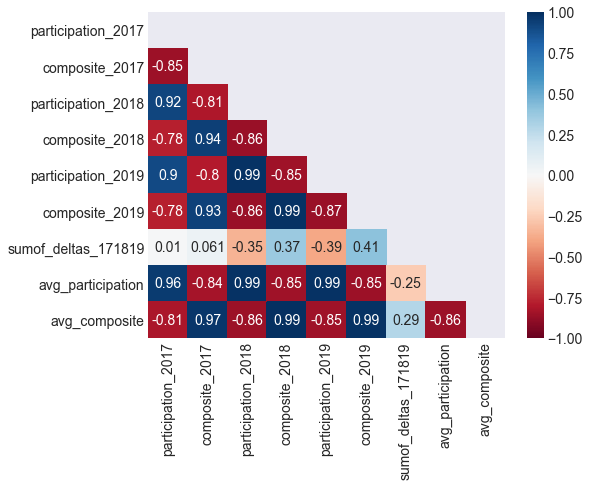

In [154]:
# Heatmap of the correlations between each column
matrix = np.triu(act.corr())
sns.heatmap(act.corr(), annot = True, square = False, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'RdBu', fmt='.2g');

**Findings on the heatmap**

- Average score and participation have a very high negative correlation of -0.86 which further proves they are inversely proportional

- the rate of change of composite scores ('sumof_deltas_171819') has a 0.37 correlation with scores of 2018 but it increases slightly to 0.41 in 2019. This could be either because of a lot of states have improved slightly their mean scores or a few states have improved dramatically better.

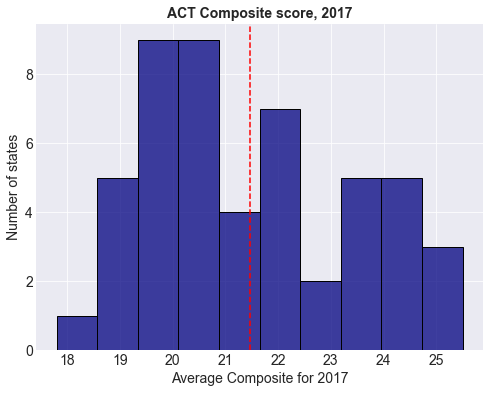

In [155]:
hist_act = sns.histplot(data = act, x = 'composite_2017', bins = 10, color = 'navy')

hist_act.set_xlabel('Average Composite for 2017')
hist_act.set_ylabel('Number of states')
hist_act.set_title('ACT Composite score, 2017', {'fontsize' : 14, 'fontweight' : 'bold'})

plt.axvline(act['composite_2017'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1.5);

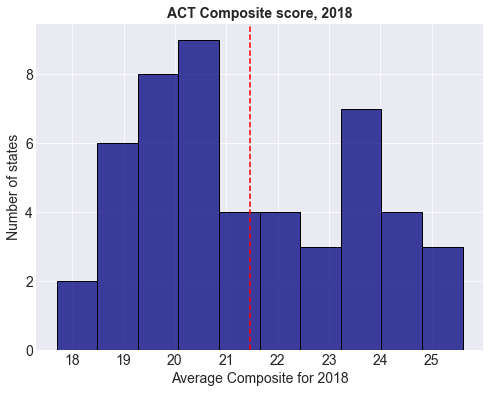

In [156]:
hist_act = sns.histplot(data = act, x = 'composite_2018', bins = 10, color = 'navy')

hist_act.set_xlabel('Average Composite for 2018')
hist_act.set_ylabel('Number of states')
hist_act.set_title('ACT Composite score, 2018', {'fontsize' : 14, 'fontweight' : 'bold'})

plt.axvline(act['composite_2018'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1.5);

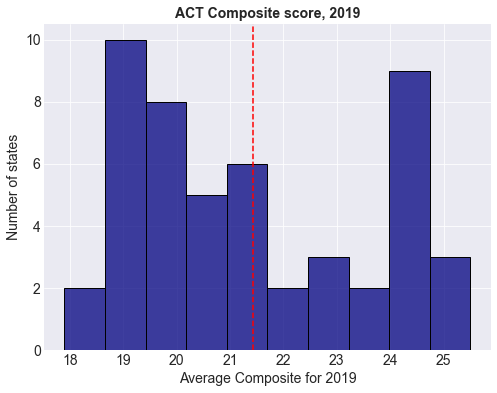

In [157]:
hist_act = sns.histplot(data = act, x = 'composite_2019', bins = 10, color = 'navy')

hist_act.set_xlabel('Average Composite for 2019')
hist_act.set_ylabel('Number of states')
hist_act.set_title('ACT Composite score, 2019', {'fontsize' : 14, 'fontweight' : 'bold'})

plt.axvline(act['composite_2019'].mean(), color = 'red', linestyle = 'dashed', linewidth = 1.5);

**Conclusions of the 3 histogram charts**

- The red dotted line is the each year's composite mean. 
- Between 2017 and 2018, there isnt much difference in terms of average score changes. On the left side of the red line, a few states have done worse and hence the bars thicken to the left. But on the right side, some states have imporved and jumped from the 22s to the 24s
- In 2019, its a similar trend. More states on the left side, have deteriorated and hence the bar around score 19 has become bigger. For the better doing states, a massive improvement is scene and they have moved towards the 24 points mark.

- The data shown above is skewed. Howeverm if we can obtain enough samples from the population and run it multiple times, we can show it as a normal distribution based on the Central Limit Theorem.

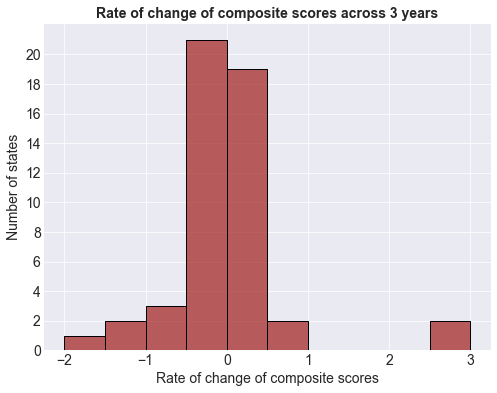

In [158]:
hist_act = sns.histplot(data = act, x = 'sumof_deltas_171819', bins = 10, color = 'brown')

hist_act.set_xlabel('Rate of change of composite scores')
hist_act.set_ylabel('Number of states')
hist_act.set_title('Rate of change of composite scores across 3 years', {'fontsize' : 14, 'fontweight' : 'bold'})
hist_act.yaxis.set_ticks(range(0,22,2));


**Conclusion**

- Most states average scores havent changed more than 0.5 across the 3 years.
- The 'outliers' on the left are the ones we should be focusing on to make an improvement.
- The states on the far right that have done well could be a good case study option.

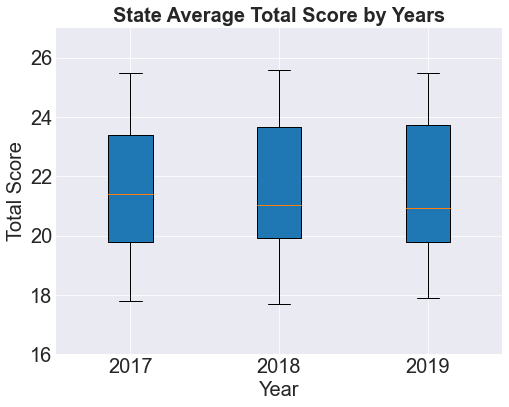

In [159]:
# create a dictionary where keys are the years, and values are the average total scores per state
dt = {'2017': act['composite_2017'], 
     '2018': act['composite_2018'], 
     '2019': act['composite_2019']}

plt.rcParams['font.size'] = 20
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
dt_plot = ax1.boxplot(dt.values(),
                     patch_artist = True,
                     labels = ['2017', '2018', '2019'])  
ax1.set_title('State Average Total Score by Years',
             {'fontsize': 20, 'fontweight': 'bold'})
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Score')
# set y limit
ax1.set_ylim([16, 27]);



**Findings on the bar plot**

- The median of ACT mean scores has dropped from 2017 to 2019 as seen by the red line.
- However, the 75th percentile has improved which goes to show the better performing states have done even better.

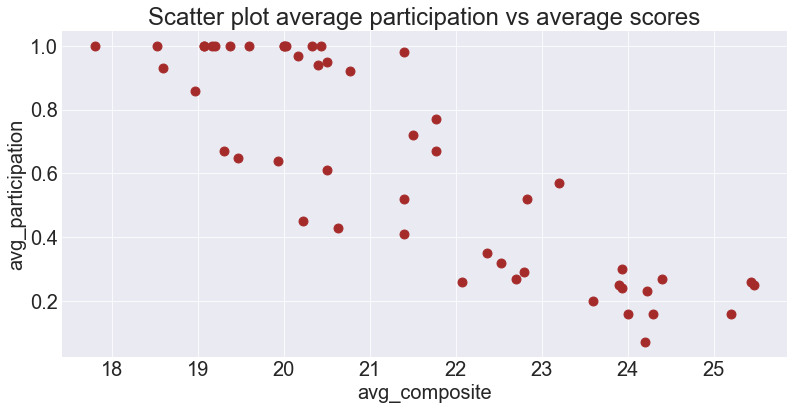

In [160]:
act.plot(x='avg_composite', y='avg_participation', kind='scatter', title = 'Scatter plot average participation vs average scores',
           color='brown', figsize=(13,6), s=80);

**Conclusions on scatter plot**

- The abvious conclusion is that as the participation on a particular state increases, its average composite score seems to decrease. I guess this is understandable as you add more students, they are going to be bringing down the average based on a normal population sample

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Conclusions**

1. The number of states that have been doing well have continued to improve while those that have been performing mediocre have become slightly worse.
2. The worse performing states in terms of average ACT scores are Nevada, Mississippi, South Carolina, Louisiana, Hawaii, Alabama and North Carolina.
3. In terms of highest rate of deterioration, its Ohio, Nebraska, Louisiana, Oklahoma and Montana.
4. There is an inverse relationship between ACT scores and participation rates. This could be because as more students write the exam, they bring the average down. In the states that have higher scores and lower participation rates, they could be having stiff competition from students writing SATs.

**Recommendations**

1. The amount of funding needs to increase in states with lower ACT scores that is mentioned above. The following can be done:
 - There needs to be a re-evaluation of the ACT coaching classes and how its run. 
 - More students should be encouraged to attend coaching sessions 
 - As participation rates are high anways, the ACT test rates can be subsidised. Some states already give a free test for the first time. For these cases, they can provide subsidies for the 2nd test.
 - ACT is known for being more straightforward than other tests. This could be used as a key marketing point
 
2. There should be an indepth analysis done on the states that are performing well in terms of ACT scores and use those findings and techniques to implement in the less performing states.
3. For the states with the lower participation rates (Maine, Rhode Island, New Hampshire, Delaware and Pennsylvania), more awareness and reach about ACT should be created to tap into students, especially those who are stronger in English and weaker in Maths. 

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!